In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
import requests

In [4]:
def download(url, filename):
    response=requests.get(url)
    if response.status_code==200:
        with open(filename, "wb") as f:
            f.write(response.content)

file_path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
download(file_path, "laptops.csv")

In [5]:
file_name="laptops.csv"

In [6]:
df=pd.read_csv(file_name, header=None)

In [7]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
1,0.0,0,Acer,4,2,1,5,14.0,0.5517241379310345,8,256,3.5280000000000005,978,Low,0,1
2,1.0,1,Dell,3,1,1,3,15.600000000000001,0.6896551724137931,4,256,4.851000000000001,634,Low,1,0
3,2.0,2,Dell,3,1,1,7,15.600000000000001,0.9310344827586208,8,256,4.851000000000001,946,Low,1,0
4,3.0,3,Dell,4,2,1,5,13.299999999999999,0.5517241379310345,8,128,2.6901,1244,Low,0,1


In [8]:
#Set first row as new header
new_header=df.iloc[0]
df=df[1:]
df.columns=new_header
df.head()

,NaN,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
1,0.0,0,Acer,4,2,1,5,14.0,0.5517241379310345,8,256,3.5280000000000005,978,Low,0,1
2,1.0,1,Dell,3,1,1,3,15.600000000000001,0.6896551724137931,4,256,4.851000000000001,634,Low,1,0
3,2.0,2,Dell,3,1,1,7,15.600000000000001,0.9310344827586208,8,256,4.851000000000001,946,Low,1,0
4,3.0,3,Dell,4,2,1,5,13.299999999999999,0.5517241379310345,8,128,2.6901,1244,Low,0,1
5,4.0,4,HP,4,2,1,7,15.600000000000001,0.6206896551724138,8,256,4.21155,837,Low,1,0


In [9]:
df.dtypes

0
NaN                 float64
Unnamed: 0           object
Manufacturer         object
Category             object
GPU                  object
OS                   object
CPU_core             object
Screen_Size_inch     object
CPU_frequency        object
RAM_GB               object
Storage_GB_SSD       object
Weight_pounds        object
Price                object
Price-binned         object
Screen-Full_HD       object
Screen-IPS_panel     object
dtype: object

In [15]:
df[['CPU_frequency']]=df[['CPU_frequency']].astype('float')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

Task 1 - Visualize individual feature patterns

(0.0, 3974.15)

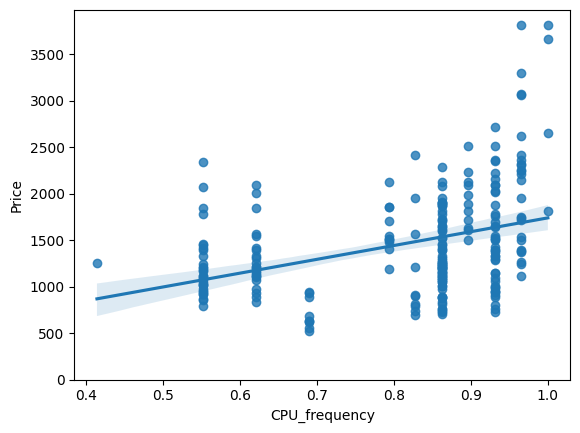

In [22]:
#Continuous valued features
# CPU_frequency plot
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)


In [19]:
df['Screen_Size_inch']=pd.to_numeric(df['Screen_Size_inch'], errors='coerce')

(0.0, 3974.15)

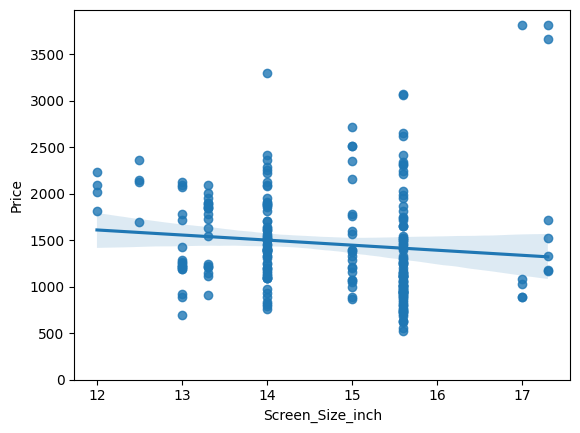

In [21]:
# Screen_Size_inch plot
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

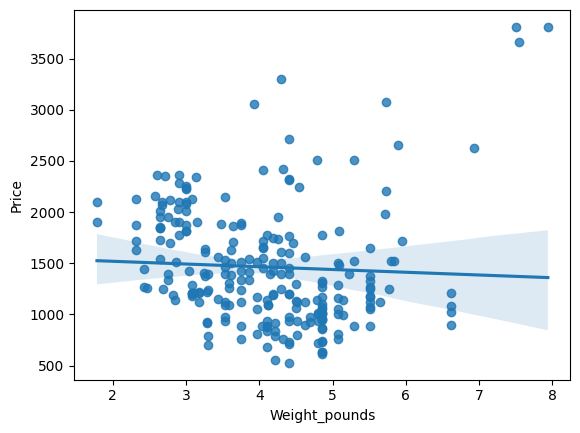

In [23]:
# Weight_pounds plot
df[['Weight_pounds']]=df[['Weight_pounds']].astype('float')
sns.regplot(x="Weight_pounds", y="Price", data=df)


# Correlation values of the three attributes with Price

In [24]:
for param in ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]:
    print(f"Correlation of Price an {param} is",
          df[[param,"Price"]].corr())

Correlation of Price an CPU_frequency is 0              CPU_frequency     Price
0                                     
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price an Screen_Size_inch is 0                 Screen_Size_inch     Price
0                                           
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price an Weight_pounds is 0              Weight_pounds     Price
0                                     
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000
